In [1]:
import effnetv2_model
import cv2
import numpy as np
import tensorflow.compat.v1 as tf

In [2]:
## Checkpoint Downloader
def download(m):
  if m not in os.listdir():
    !wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/v2/{m}.tgz
    !tar zxf {m}.tgz
  ckpt_path = os.path.join(os.getcwd(), m)
  return ckpt_path

In [3]:
## Specify which EfficientNetV2 model you want
MODEL = 'efficientnetv2-s'

In [4]:
# Download checkpoint.
ckpt_path = download(MODEL)
if tf.io.gfile.isdir(ckpt_path):
  ckpt_path = tf.train.latest_checkpoint(ckpt_path)

In [5]:
labels_map = 'labels_map.txt'
model = effnetv2_model.EffNetV2Model(MODEL)
model.load_weights(ckpt_path)
cfg = model.cfg

Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


In [18]:
import preprocessing
image_file = 'cat.jpg'
image = tf.io.read_file(image_file)
image = preprocessing.preprocess_image(image, cfg.eval.isize, is_training=False, augname=cfg.data.augname)
logits = model(tf.expand_dims(image, 0), False)[0]

{'Egyptian cat'}


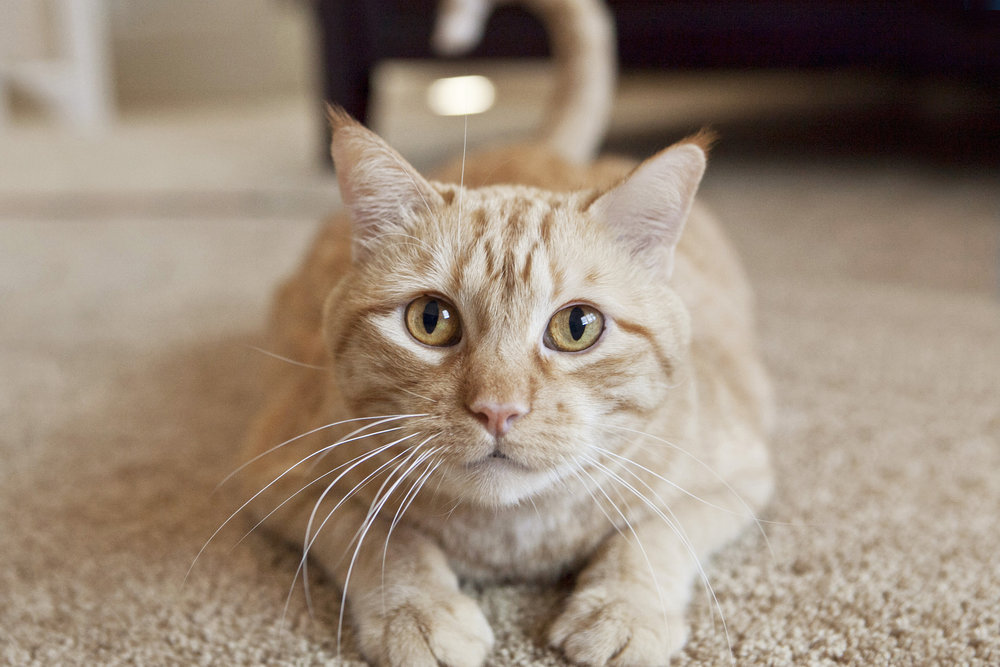

In [19]:
# Output classes and probability
pred = tf.keras.layers.Softmax()(logits)
idx = tf.argsort(logits[0])[::-1][:5].numpy()
id = idx[0]
print({classes[id]})
# import ast
# classes = ast.literal_eval(open(labels_map, "r").read())
# for i, id in enumerate(idx):
  # print(f'top {i+1} ({pred[0][id]*100:.1f}%):  {classes[id]} ')
from IPython import display
display.display(display.Image(image_file))